## Importing the packages

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd 

## Importing data

In [4]:
data = pd.read_csv('../input/handwritten-data/A_Z Handwritten Data.csv')
data.rename(columns={'0':'label'}, inplace=True)
data.shape

(372450, 785)

## Getting data ready

In [5]:
X = data.drop('label',axis = 1)
y = data['label']
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((249541, 784), (122909, 784), (249541,), (122909,))

## Plotting Sample point

In [6]:
randomPt = np.array(X_train[:1].values).reshape(28, 28)
randomPty = chr(Y_train[:1]+65)

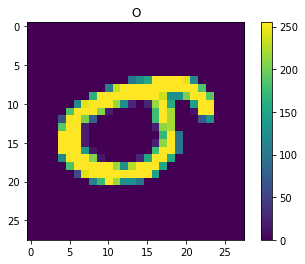

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(randomPt)
plt.colorbar()
plt.grid(False)
plt.title(randomPty)
plt.show()

## Data Preprocessing

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [9]:
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

## Defining and compiling the model

In [13]:
# Model architecture taken from Yair Hadad

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(Y_test.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fitModel = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=128, verbose=1)

Epoch 1/5
1950/1950 [==============================] - 26s 13ms/step - loss: 0.1364 - accuracy: 0.9620 - val_loss: 0.0568 - val_accuracy: 0.9849
Epoch 2/5
1950/1950 [==============================] - 26s 13ms/step - loss: 0.0482 - accuracy: 0.9865 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 3/5
1950/1950 [==============================] - 25s 13ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0427 - val_accuracy: 0.9894
Epoch 4/5
1950/1950 [==============================] - 25s 13ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0407 - val_accuracy: 0.9891
Epoch 5/5
1950/1950 [==============================] - 26s 13ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0346 - val_accuracy: 0.9920


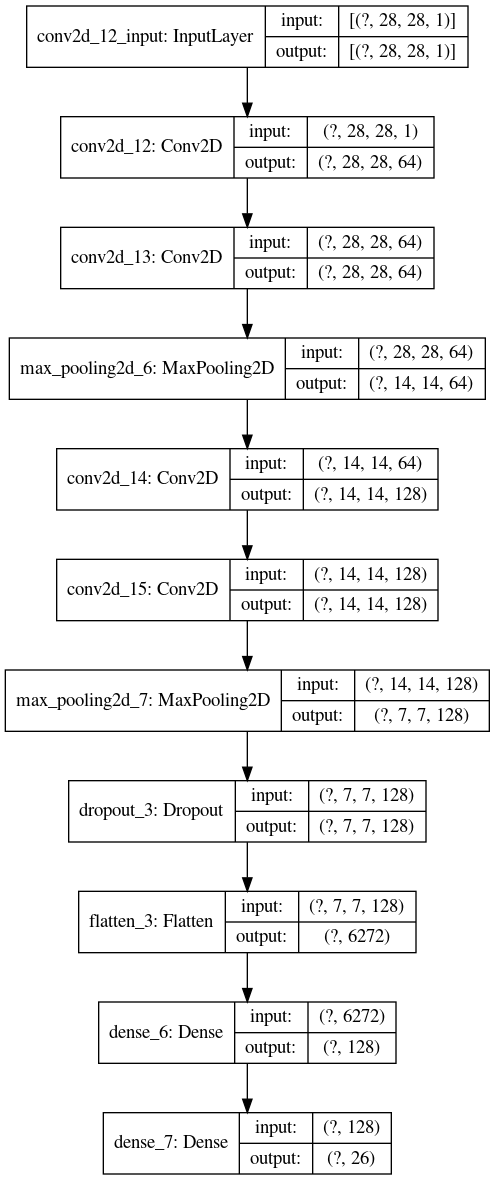

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model_func.png', show_shapes=True)

## Saving model and Seeing Various paramters

In [14]:
model.save('handWritten.model')
model.save_weights("handWritten.h5")

In [15]:
scores = model.evaluate(X_test, Y_test)
print("Score:",scores[1])

3841/3841 [==============================] - 12s 3ms/step - loss: 0.0346 - accuracy: 0.9920
Score: 0.9919778108596802


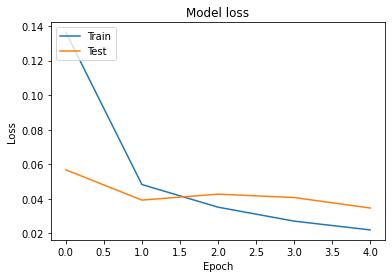

In [16]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()